In [1]:
import nltk
import re
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
import numpy as np
import pandas
import glob
#import powerlaw
import itertools
import os
import nltk.data

In [2]:
def drange(start, stop, step):
    r = start
    while r <= stop:
        yield r
        r += step
        
        
def seqenc(start, stop, step):
    return [ x for x in drange(start, stop, step)] 

def utf8len(s):
    return len(s.encode('utf-8'))

In [3]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
pattern = r'''\w+(?:[-']\w+)*'''
pattern2 = r'''\w+(?:[-']\w+)*|[.,;?!:]'''
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
split_pun=['.',',','?','!',';',':']

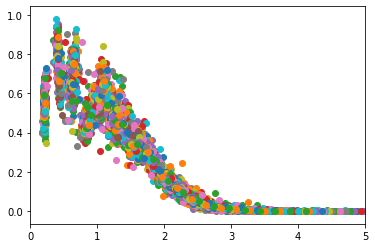

In [4]:
'''NND for many text'''
directory = "/home/xierr/Desktop/pato_new/Portugese_use/"
outputdir = "/home/xierr/Desktop/pato_new/Portugese_NND_results"
outputdir2 = "/home/xierr/Desktop/pato_new/Portugese_L_results"
for book in os.listdir(directory):
    if not book.startswith("."):
        with open(directory + book) as f:
            input_str=f.read()
            input_str = input_str.lower()
            input_str = re.sub(r'\d+', '', input_str)   #Numbers removing
            input_str = re.sub(r'[\t\n]+', ' ', input_str)  #remove \t
            input_str = re.sub(r'[*]', ' ', input_str)
            input_str= input_str.strip()              #remove whitespaces
        
            tokens = nltk.regexp_tokenize(input_str, pattern)
    
            num_words=len(tokens)
            word_len=[len(w) for w in tokens]
            aver_leng=sum(word_len)/num_words
            wlen_fre=nltk.FreqDist(word_len)
    
            x=[(v/aver_leng) for v in sorted(wlen_fre)]
            y=[ ((wlen_fre[key]/sum(wlen_fre.values()))*aver_leng) for key in sorted(wlen_fre)]
        
            d = {'x':x, 'y':y}
            df = pandas.DataFrame(data=d)
            df.to_csv(outputdir + '/' + book, sep='\t', index=False, header=None)
            
            outfile = open(outputdir2 + '/' + book, 'w')
            outfile.write('%r' % aver_leng)
            outfile.close()

            plt.figure('Draw')
            plt.scatter(x, y)
            plt.xlim(0, 5)
            plt.draw()
        
        


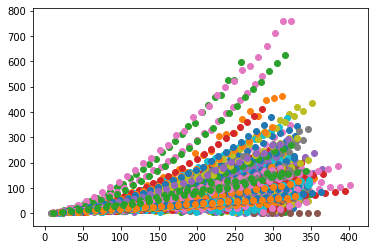

In [5]:
'''NV for many text'''
directory = "/home/xierr/Desktop/pato_new/Portugese_use/"
outputdir = "/home/xierr/Desktop/pato_new/Portugese_NV_results"
for book in os.listdir(directory):
    if not book.startswith("."):
        with open(directory + book) as f:
            input_str=f.read()
            input_str = input_str.lower()
            input_str = re.sub(r'\d+', '', input_str)   #Numbers removing
            input_str = re.sub(r'[\t\n]+', ' ', input_str)  #remove \t
            input_str = re.sub(r'[*]', ' ', input_str)
            input_str= input_str.strip()              #remove whitespaces
        
            tokens = nltk.regexp_tokenize(input_str, pattern)
        
            data=[len(w) for w in tokens]
            all_wlen=sum([len(w) for w in tokens])
            num_words=len(tokens)
            aver_leng=(all_wlen/num_words)
            #number=[pos for pos, char in enumerate(input_str) if char == ' ']
            xsplit=all_wlen+len(tokens)-1
        
            number=[]
            datcu=[]
            datcu.append(data[0])
            number.append(datcu[0])
            for i in range(1, len(data)-1, 1):
                datcu.append(datcu[i-1]+data[i])
                number.append(datcu[i]+i)
    
            vari=[]
            for L in range(50,1550,50):
                remain=xsplit%L
                if remain==0:
                    leng=xsplit+L
                    seq_vec1=seqenc(0, leng-1, L)   
                    seq_vec2=seqenc(((L/2)-1), (leng-L-1),L) 
                    ncut1=pandas.cut(number, seq_vec1, right=False)
                    n1=list(pandas.Series(ncut1).value_counts())
                    ncut2=pandas.cut(number, seq_vec2, right=False)
                    n2=list(pandas.Series(ncut2).value_counts())
                    n=[i for i in n1+n2 if i!=0]
                    vari.append(np.mean(np.square(n))-np.square(np.mean(n)))  
                else:
                    leng=xsplit-remain+L
                    seq_vec1=seqenc(0, leng-1, L)   
                    seq_vec2=seqenc(((L/2)-1), (leng-L-1),L) 
                    ncut1=pandas.cut(number, seq_vec1, right=False)
                    n1=list(pandas.Series(ncut1).value_counts())
                    ncut2=pandas.cut(number, seq_vec2, right=False)
                    n2=list(pandas.Series(ncut2).value_counts())
                    n=[i for i in n1+n2 if i!=0]
                    vari.append(np.mean(np.square(n))-np.square(np.mean(n))) 
            
            L_vec=[x/aver_leng for x in range(50, 1550,50)]
        
            d = {'L_vec':L_vec, 'vari':vari}
            df = pandas.DataFrame(data=d)
            df.to_csv(outputdir + '/' + book, sep='\t', index=False, header=None)
        
            plt.figure('Draw')
            plt.scatter(L_vec, vari)
            plt.draw()
        
    
    
#plt.plot(L_vec, L_vec) 
#plt.savefig('Portugese_NV.png')